# **EDA**

**IMPORTA DATOS - EXPLORACION INICIAL**

---



In [1]:
import zipfile
import pandas as pd
import matplotlib.pyplot as plt

# Define la ruta de tu archivo ZIP en Google Drive
zip_file_path = '/content/drive/MyDrive/CODING_DOJO/Data_set/vehicles.zip'

# Abre y extrae el contenido del archivo ZIP
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Listar los archivos contenidos en el archivo ZIP
    zip_ref.extractall()  # Extrae todo en el directorio actual

# Verificar qué archivos fueron extraídos
import os
print(os.listdir("."))  # Esto te mostrará los archivos extraídos



['.config', 'drive', 'vehicles.csv', 'sample_data']


In [2]:
# Asume que el archivo Excel se llama 'archivo_excel.xlsx'
csv_file = 'vehicles.csv'

# Cargar el archivo Excel como un DataFrame
df = pd.read_csv(csv_file)

# Mostrar las primeras filas del DataFrame
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

**DATOS INUSUALES**

---



Para reunir los datos se uso un raspador(web scraping) una herramienta que se usa para extraer datos de una manera automatizada.
Eso quiere decir que los datos ingresados muy dificilmnete se hayan ejecutado de forma manual, mas probable que se utilizo alguna ubicacion gps para recolectar esta informacion.
Despues de lo analizado resulta incoherente conservar datos donde la latitud y longitud sea fuera del territorio de EE.UU


In [4]:
min_latitud = 24.51  # Southernmost point in Hawaii (approx)
max_latitud = 49.38  # Northernmost point in Alaska (approx)
min_longitud = -171.83  # Westernmost point in Alaska (approx)
max_longitud = -66.95  # Easternmost point in Maine (approx)

In [5]:
#NUEVO DF CON DATOS SOLO DE USA
data = df[(df['lat'] >= min_latitud) & (df['lat'] <= max_latitud) &
                 (df['long'] >= min_longitud) & (df['long'] <= max_longitud)]

#ELIMINAR COLUMNAS QUE NO APORTAN NADA A MI MODELO ('description', 'image_url',county)
data = data.drop(['description', 'image_url','county','id','url', 'region_url'], axis=1)
data = data.reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413819 entries, 0 to 413818
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        413819 non-null  object 
 1   price         413819 non-null  int64  
 2   year          412722 non-null  float64
 3   manufacturer  396649 non-null  object 
 4   model         408791 non-null  object 
 5   condition     249462 non-null  object 
 6   cylinders     239678 non-null  object 
 7   fuel          411059 non-null  object 
 8   odometer      409506 non-null  float64
 9   title_status  405736 non-null  object 
 10  transmission  411433 non-null  object 
 11  VIN           258929 non-null  object 
 12  drive         286184 non-null  object 
 13  size          114499 non-null  object 
 14  type          322519 non-null  object 
 15  paint_color   285754 non-null  object 
 16  state         413819 non-null  object 
 17  lat           413819 non-null  float64
 18  long

In [6]:
#PRECIO
pd.set_option('display.float_format', '{:.2f}'.format)
data.describe().round(2)
#Me resulta dificil de entender por que existe una valor que supera al millon de dolares en precio

,price,year,odometer,lat,long
count,413819.00,412722.00,409506.00,413819.00,413819.00
mean,77058.68,2011.17,98827.06,38.44,-93.89
std,12373033.53,9.51,216354.26,5.24,16.86
min,0.00,1900.00,0.00,24.56,-131.92
25%,5950.00,2008.00,38004.50,34.74,-110.98
50%,13900.00,2013.00,86387.50,39.15,-88.07
75%,26499.00,2017.00,134600.00,42.35,-80.73
max,3736928711.00,2022.00,10000000.00,49.25,-67.14


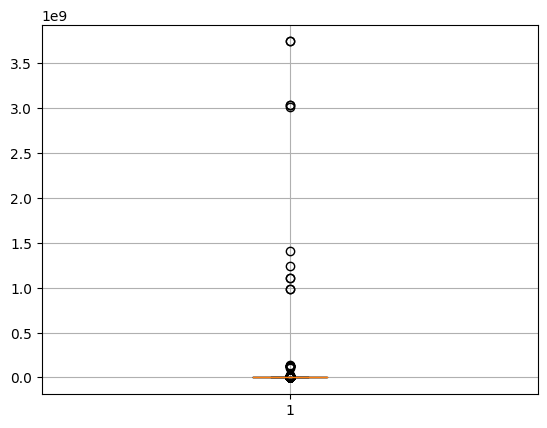


Se observa valores atipicos de los precios a partir de los 600 000 doalres, procedere a elimiar mis datos desde ese numero


In [7]:
plt.boxplot(data['price'])
plt.grid(True)
plt.show()
print('\nSe observa valores atipicos de los precios a partir de los 600 000 doalres, procedere a elimiar mis datos desde ese numero')

In [8]:
p = data[data['price']>600000]
p

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state,lat,long,posting_date
252,birmingham,987654321,1960.00,chevrolet,NaN,NaN,NaN,gas,999999.00,clean,manual,NaN,NaN,NaN,NaN,NaN,al,33.63,-86.60,2021-05-02T13:24:09-0500
1799,dothan,99999999,1993.00,ford,ranger,NaN,NaN,gas,99999.00,clean,automatic,NaN,NaN,NaN,NaN,NaN,al,31.05,-85.83,2021-05-02T17:18:25-0500
22552,fresno / madera,1111111,2014.00,chevrolet,NaN,NaN,NaN,other,11.00,clean,automatic,NaN,NaN,NaN,NaN,NaN,ca,37.67,-121.01,2021-04-30T12:20:06-0700
25856,humboldt county,1111111111,1999.00,ford,f350 super duty lariat,good,8 cylinders,diesel,149000.00,clean,automatic,NaN,rwd,full-size,pickup,white,ca,40.95,-124.08,2021-04-11T11:40:08-0700
33872,modesto,1111111111,2020.00,jeep,NaN,NaN,NaN,gas,1000.00,clean,automatic,NaN,4wd,NaN,NaN,NaN,ca,37.64,-120.97,2021-04-28T14:29:17-0700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365687,killeen / temple / ft hood,1234567,1955.00,chevrolet,NaN,NaN,NaN,other,99999.00,missing,other,NaN,NaN,NaN,NaN,NaN,tx,31.05,-97.50,2021-04-04T17:28:43-0500
367305,mcallen / edinburg,25003000,1991.00,chevrolet,camaro,fair,6 cylinders,gas,200000.00,clean,automatic,NaN,NaN,NaN,NaN,NaN,tx,26.24,-97.68,2021-04-12T12:36:37-0500
373027,waco,1234567,1955.00,chevrolet,NaN,good,NaN,other,99999.00,missing,other,NaN,NaN,NaN,NaN,NaN,tx,31.05,-97.50,2021-04-09T06:00:14-0500
373053,waco,1234567,1955.00,chevrolet,NaN,good,NaN,other,99999.00,missing,other,NaN,NaN,NaN,NaN,NaN,tx,31.05,-97.50,2021-04-07T17:21:24-0500


In [9]:
# se eliminaran datos incronguentes que no aportan nada al modelo, ya que un precio que supere esasa cantidades es absurdo

data = data[(data['price'] >= 10) & (data['price'] < 600000)]  #FILTRE LOS DATOS EN M IDF QUE SOLO CUMPLEN LAS CONDICIONES

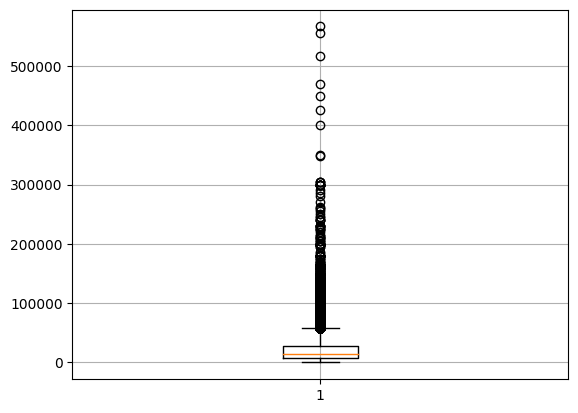

Igual se oserva bastante valores atipicos pero una dispersiona tan extensa como la anteriror


In [10]:
plt.boxplot(data['price'])
plt.grid(True)
plt.show()
print('Igual se oserva bastante valores atipicos pero una dispersiona tan extensa como la anteriror')

**DATOS NULOS**

---



In [11]:
data.isna().sum()

,0
region,0
price,0
year,1080
manufacturer,15593
model,4482
condition,144180
cylinders,157066
fuel,2362
odometer,2206
title_status,7581


**NULOS CON PORCENTAJE MENOR AL 2%**

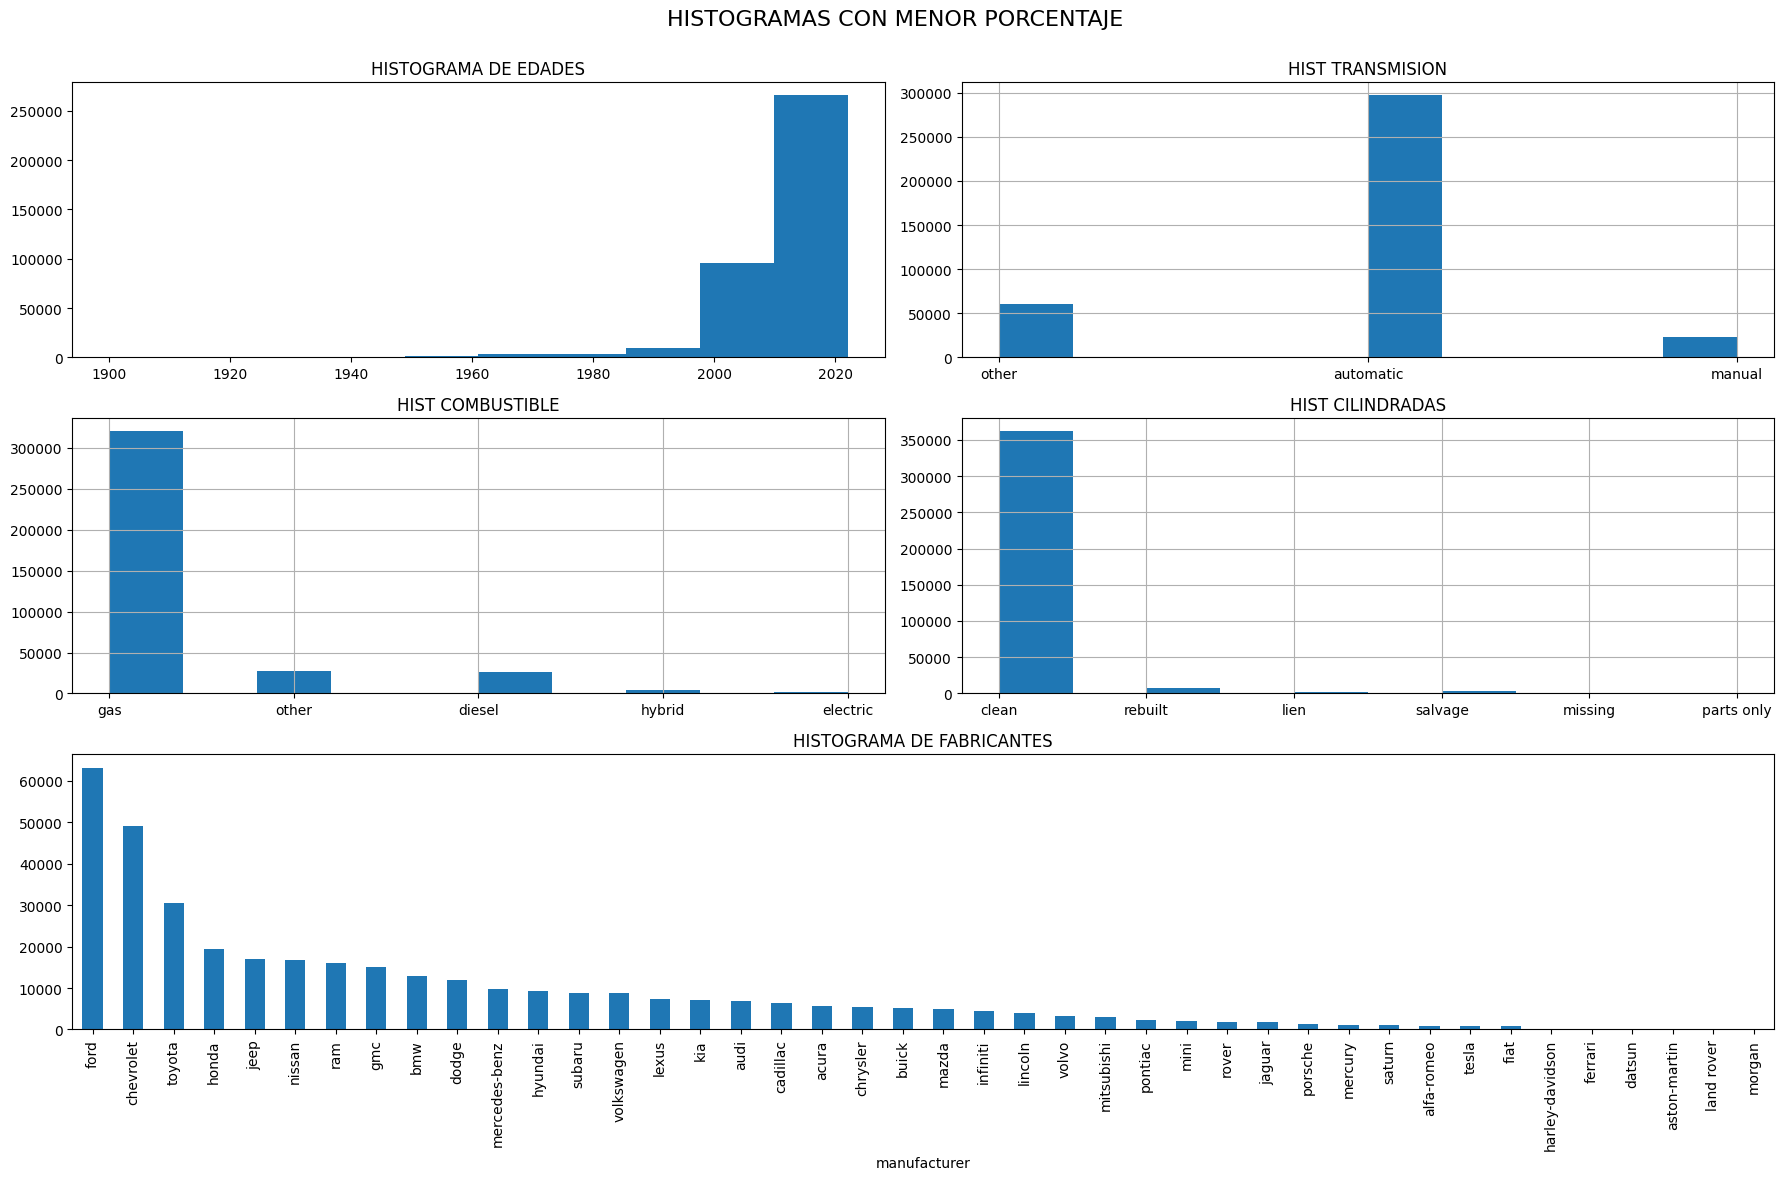


Aqui estan todas las columnas donde los valores nulos no superan ni el 5% de los datos
En la mayoria de datos existe una preferencia de los datos, un valor prevalece sobre los demas
Por este motivo utlizare la moda para reemplazar todos estos valores


In [12]:
figura = plt.figure(figsize=(18,12))

plt.subplot(3,2,1)
plt.title('HISTOGRAMA DE EDADES') #1097 NA = 0.2%
plt.hist(data['year'])

plt.subplot(3,2,2)
data['transmission'].hist() #2386 NA = 0.5%
plt.title('HIST TRANSMISION')

plt.subplot(3,2,3)
data['fuel'].hist() #2760 =  0.6%
plt.title('HIST COMBUSTIBLE')

plt.subplot(3,2,4)
data['title_status'].hist() #8083 = 1.9%
plt.title('HIST CILINDRADAS')

plt.subplot(3,2,(5,6))
plt.title('HISTOGRAMA DE FABRICANTES')
data['manufacturer'].value_counts().plot(kind='bar') #17170 NA = 4%

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.suptitle('HISTOGRAMAS CON MENOR PORCENTAJE', fontsize=16)
plt.show()
plt.close()
print('\nAqui estan todas las columnas donde los valores nulos no superan ni el 5% de los datos')
print('En la mayoria de datos existe una preferencia de los datos, un valor prevalece sobre los demas')
print('Por este motivo utlizare la moda para reemplazar todos estos valores')


In [13]:
#SUSTITUCION CON LA MODA DE TODOS LAS COLUMNAS CON NULOS MENORES DEL 5%
for column in ['year', 'manufacturer', 'fuel', 'title_status', 'transmission']:
    data[column] = data[column].fillna(data[column].mode()[0])

In [14]:
data[['year', 'manufacturer', 'fuel', 'title_status', 'transmission']].isna().sum()

,0
year,0
manufacturer,0
fuel,0
title_status,0
transmission,0


**NULOS CON PORCENTAJE MAYOR AL 20%**

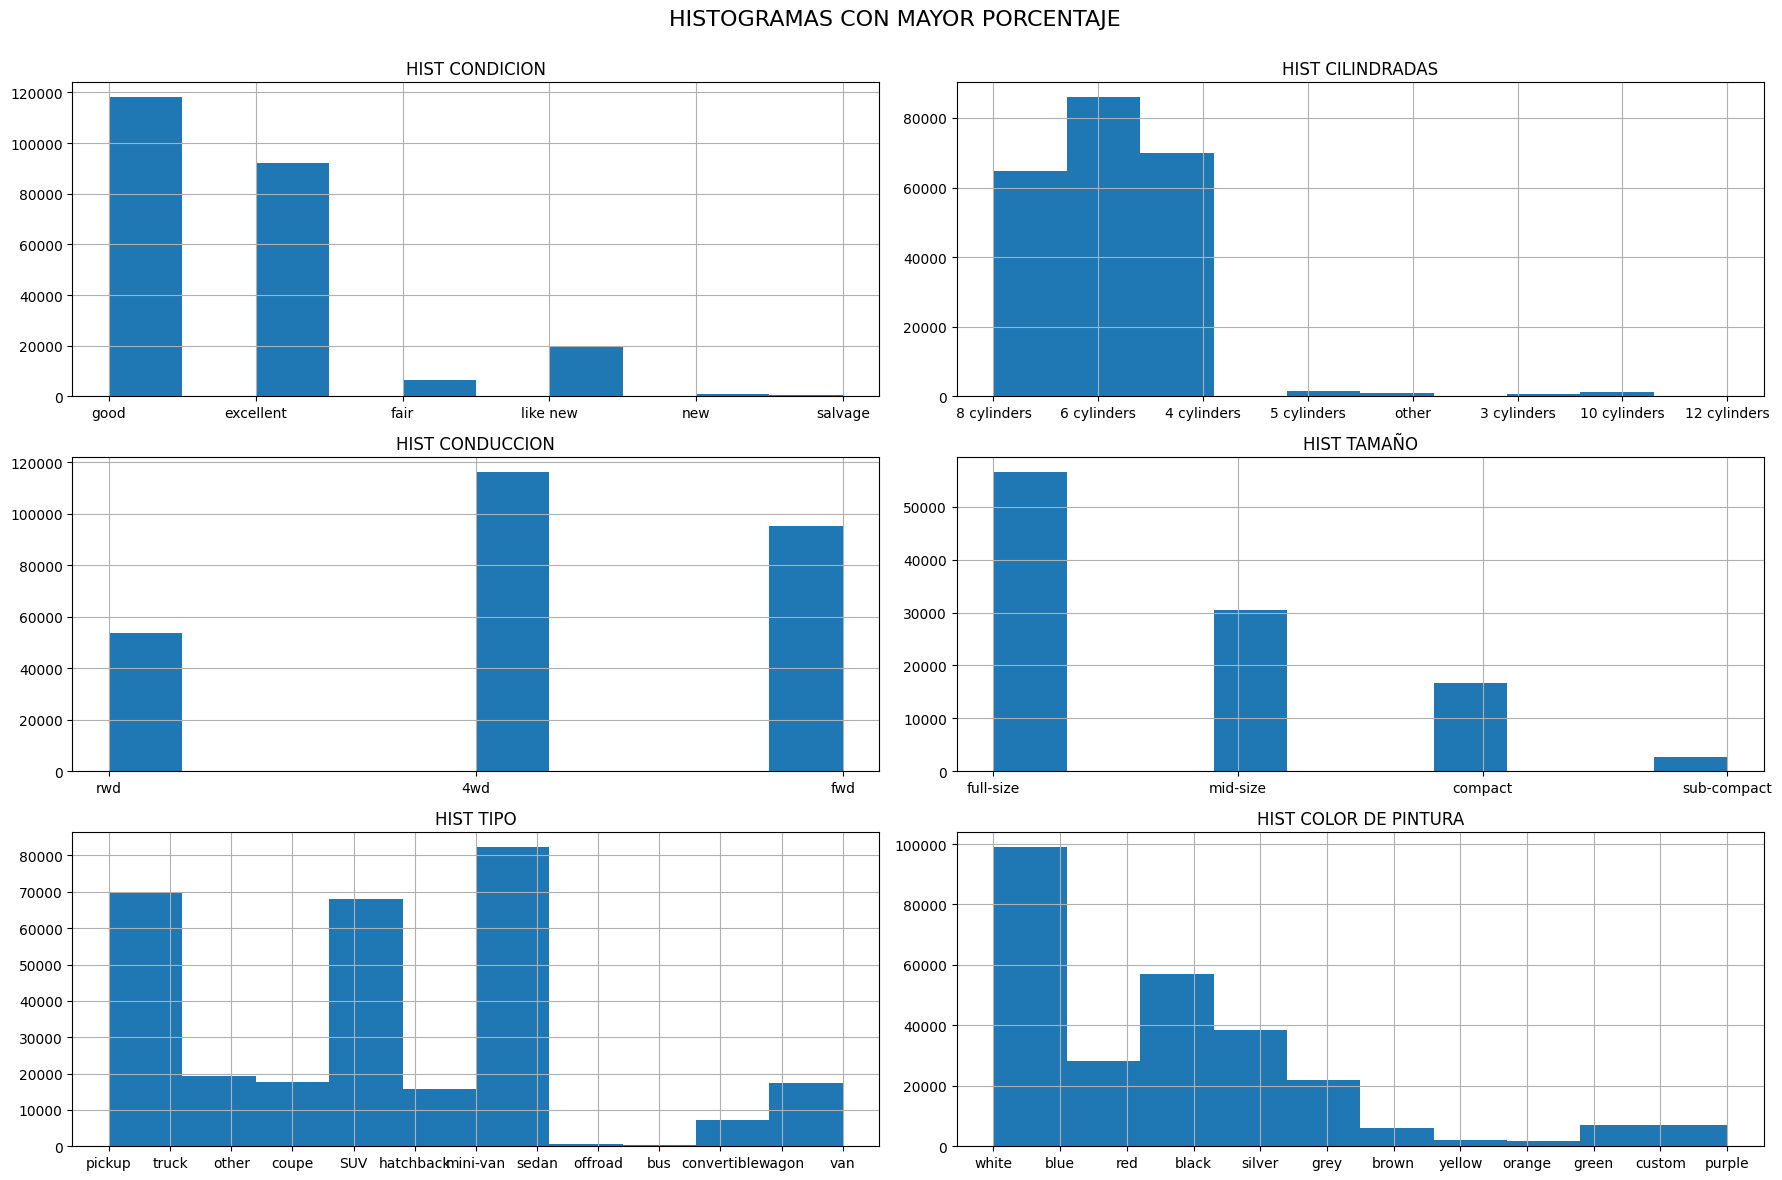


En los 6 graficos tiene un % de NA muy alto
Aunque se observa una preferencia por algunos datos, considero que seria imprudente llenarlo con algun valor estadistic(moda, media)
Si opto por un valor estadistico, mi grafico solo le dara mas valor a las preferencias, reduciendo el valor de la competencia
Por ese motivo lo sustituire por el valor de "DESCONOCIDO"


In [15]:
fig = plt.figure(figsize=(18,12))

plt.subplot(3,2,1)
data['condition'].hist() #164357 NA =39%
plt.title('HIST CONDICION')

plt.subplot(3,2,2)
data['cylinders'].hist() #174141 = 42%
plt.title('HIST CILINDRADAS')

plt.subplot(3,2,3)
data['drive'].hist() #127635 NA = 31%
plt.title('HIST CONDUCCION')

plt.subplot(3,2,4)
data['size'].hist() #299320 NA = 72%
plt.title('HIST TAMAÑO')

plt.subplot(3,2,5)
data['type'].hist() #91300 NA = 22%
plt.title('HIST TIPO')

plt.subplot(3,2,6)
data['paint_color'].hist() #128065 = 31%
plt.title('HIST COLOR DE PINTURA')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.suptitle('HISTOGRAMAS CON MAYOR PORCENTAJE', fontsize=16)
plt.show()
plt.close()
print('\nEn los 6 graficos tiene un % de NA muy alto')
print('Aunque se observa una preferencia por algunos datos, considero que seria imprudente llenarlo con algun valor estadistic(moda, media)')
print('Si opto por un valor estadistico, mi grafico solo le dara mas valor a las preferencias, reduciendo el valor de la competencia')
print('Por ese motivo lo sustituire por el valor de "DESCONOCIDO"')


In [16]:
for column in ['condition','drive','size','type','paint_color']:
  data[column].fillna('DESCONOCIDO', inplace=True)

data[column].isna().sum()


0

In [17]:
data['cylinders'].fillna('other', inplace = True) # lo sustituyo por este valor
data['cylinders'].isna().sum()

0

**COLUMNAS ATIPICAS**

<Axes: >

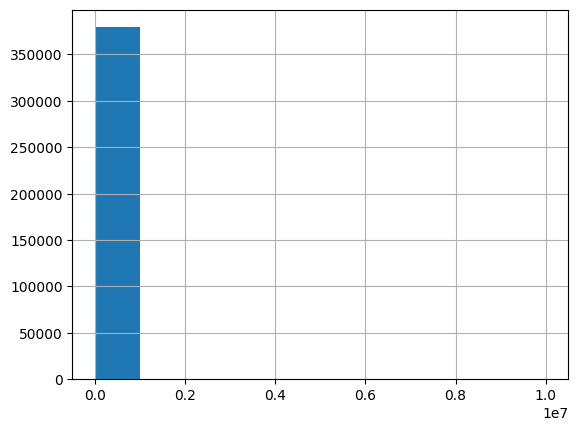

In [18]:
#ODOMETER(KM RECORRIDO) , 4313 NA = 1%
#==================================================
# Lo completare por el promedio de km promedio
data['odometer'].hist()

In [19]:
data['odometer'].fillna(data['odometer'].mean(), inplace=True)
#Comprobar que lso valores fueron sustituidos
data['odometer'].isna().sum()

0

In [20]:
#VIN 154890 = 37%
#===================================
#es como su numero de placa, ya que representa un numero alto de valores (37%) reemplzare los NA con "desconocido"
data['VIN'].unique()

array(['3GTP1VEC4EG551563', '1GCSCSE06AZ123805', '3GCPWCED5LG130317', ...,
       '2HGES15535H620534', '1FDWF37P64EA24868', 'SAJGX2749VCOO8376'],
      dtype=object)

In [21]:
data['VIN'].fillna('DESCONOCIDO', inplace=True)
data['VIN'].isna().sum()

0

In [22]:
#MODEL 5028 = 1.2%
#===========================================================
#SE IMPUTARA EL FABRICANTE + AÑO
data['model'].unique()

array(['sierra 1500 crew cab slt', 'silverado 1500',
       'silverado 1500 crew', ..., 'gand wagoneer', '96 Suburban',
       'Paige Glenbrook Touring'], dtype=object)

In [23]:
data['year'] = data['year'].astype(str)
modelo = data['manufacturer'] + '' + data['year']
data['model'].fillna(modelo, inplace=True)
data['model'].isna().sum()

0

In [24]:
data['year'] = data['year'].astype(float) # una vez tenga mi columna sustituida, devolver el valor de mi columna a su valor original

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 382240 entries, 0 to 413818
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        382240 non-null  object 
 1   price         382240 non-null  int64  
 2   year          382240 non-null  float64
 3   manufacturer  382240 non-null  object 
 4   model         382240 non-null  object 
 5   condition     382240 non-null  object 
 6   cylinders     382240 non-null  object 
 7   fuel          382240 non-null  object 
 8   odometer      382240 non-null  float64
 9   title_status  382240 non-null  object 
 10  transmission  382240 non-null  object 
 11  VIN           382240 non-null  object 
 12  drive         382240 non-null  object 
 13  size          382240 non-null  object 
 14  type          382240 non-null  object 
 15  paint_color   382240 non-null  object 
 16  state         382240 non-null  object 
 17  lat           382240 non-null  float64
 18  long     

In [26]:
data.isna().sum()

,0
region,0
price,0
year,0
manufacturer,0
model,0
condition,0
cylinders,0
fuel,0
odometer,0
title_status,0


# **PREPROCESAMIENTO**

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 382240 entries, 0 to 413818
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        382240 non-null  object 
 1   price         382240 non-null  int64  
 2   year          382240 non-null  float64
 3   manufacturer  382240 non-null  object 
 4   model         382240 non-null  object 
 5   condition     382240 non-null  object 
 6   cylinders     382240 non-null  object 
 7   fuel          382240 non-null  object 
 8   odometer      382240 non-null  float64
 9   title_status  382240 non-null  object 
 10  transmission  382240 non-null  object 
 11  VIN           382240 non-null  object 
 12  drive         382240 non-null  object 
 13  size          382240 non-null  object 
 14  type          382240 non-null  object 
 15  paint_color   382240 non-null  object 
 16  state         382240 non-null  object 
 17  lat           382240 non-null  float64
 18  long     

In [28]:
data.select_dtypes(include=['int64', 'float64']).columns

Index(['price', 'year', 'odometer', 'lat', 'long'], dtype='object')

In [29]:
data.columns

Index(['region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'size', 'type', 'paint_color', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [30]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt

#REDUCIR EL TAMAÑO DE LAS MUESTRAS YA QUE LA DATA ES MUY PESADA
data_sample = data.sample(frac=0.3, random_state=42)

#DIVIDIR VALORE INDEPENDIENTES Y DEPENDIENTES
X = data_sample.drop(['price', 'lat', 'long','posting_date'],axis=1)
y = data_sample['price']

#DIVIDIR NUMENAL, NOMINALES Y ORDINALES
numeral = X.select_dtypes(include=['int64', 'float64']).columns
nominal = ['region', 'manufacturer', 'model', 'fuel','title_status', 'transmission', 'VIN', 'drive', 'size', 'type','paint_color', 'state']
ordinal = ['condition','cylinders']
#ordinales
condicion = ['new', 'like new', 'excellent', 'good', 'fair', 'salvage', 'DESCONOCIDO']
cilindrada = ['12 cylinders', '10 cylinders', '8 cylinders','6 cylinders', '5 cylinders', '4 cylinders', '3 cylinders', 'other']

#NUMERALES
impu_num = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scalar', StandardScaler())
])
#NOMINALES
impu_nom = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy= 'most_frequent')),
    ('one', OneHotEncoder(handle_unknown='ignore'))
])
#ORDINALES
impu_ord = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordina', OrdinalEncoder(categories=[condicion, cilindrada]))
])

In [31]:
#TRANSFORMACION
#=======================
preprocesamiento = ColumnTransformer(
    transformers=[
        ('num', impu_num, numeral),
        ('nom', impu_nom, nominal),
        ('ord', impu_ord, ordinal)
    ],
    remainder='passthrough', #Dejar columnas no transformadas
    n_jobs=-1,              #Usar todos los nucleos disponibles para el procesamiento
    verbose=True,           #Imprime informacion sobre el proceso, recomendado en dataset grandes
    sparse_threshold =0.3
)
preprocesamiento

ColumnTransformer(n_jobs=-1, remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('scalar', StandardScaler())]),
                                 Index(['year', 'odometer'], dtype='object')),
                                ('nom',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('one',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['region', 'm...
                                  'state']),
                                ('ord',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordina',
                                                  OrdinalEncoder(categories=[['new',
                                                                              'like '
                                                                              'new',
                                                                              'excellent',
                                                                              'good',
                                                                              'fair',
                                                                              'salvage',
                                                                              'DESCONOCIDO'],
                                                                             ['12 '
                                                                              'cylinders',
                                                                              '10 '
                                                                              'cylinders',
                                                                              '8 '
                                                                              'cylinders',
                                                                              '6 '
                                                                              'cylinders',
                                                                              '5 '
                                                                              'cylinders',
                                                                              '4 '
                                                                              'cylinders',
                                                                              '3 '
                                                                              'cylinders',
                                                                              'other']]))]),
                                 ['condition', 'cylinders'])],
                  verbose=True)

In [32]:
#DIVISION DEL CONJUNTO DE DATOS
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)


# **MODELOS**

**REGRESION LINEAL**

In [33]:
lineal = Pipeline(steps=[
    ('pre', preprocesamiento),
    ('modelo', LinearRegression())
])
lineal

Pipeline(steps=[('pre',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scalar',
                                                                   StandardScaler())]),
                                                  Index(['year', 'odometer'], dtype='object')),
                                                 ('nom',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one',
                                                                   OneHotEncoder(handle_unknown='i...
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordina',
                                                                   OrdinalEncoder(categories=[['new',
                                                                                               'like '
                                                                                               'new',
                                                                                               'excellent',
                                                                                               'good',
                                                                                               'fair',
                                                                                               'salvage',
                                                                                               'DESCONOCIDO'],
                                                                                              ['12 '
                                                                                               'cylinders',
                                                                                               '10 '
                                                                                               'cylinders',
                                                                                               '8 '
                                                                                               'cylinders',
                                                                                               '6 '
                                                                                               'cylinders',
                                                                                               '5 '
                                                                                               'cylinders',
                                                                                               '4 '
                                                                                               'cylinders',
                                                                                               '3 '
                                                                                               'cylinders',
                                                                                               'other']]))]),
                                                  ['condition', 'cylinders'])],
                                   verbose=True)),
                ('modelo', LinearRegression())])

In [34]:
#ENTRENAMIENTO
lineal.fit(X_train,y_train)
#PARAMETRO DE ENTRENAMIENTO
lineal_pred_train = lineal.predict(X_train)
r2_train_lineal = r2_score(y_train, lineal_pred_train)#evalua en entrenamiento mas no el modelo

#PREDICCION
lineal_pred = lineal.predict(X_test)
#COMPROBAR PARAMETROS
r2_lineal = r2_score(y_test, lineal_pred)
mse_lineal = mean_squared_error(y_test, lineal_pred)
msa_lineal = mean_absolute_error(y_test, lineal_pred)
print('REGRESION LINEAL')
print('R2 DE ENTRENAMIENTO:', r2_train_lineal)
print('R2:', r2_lineal)
print('MSE:', mse_lineal)
print('MSA', msa_lineal)

REGRESION LINEAL
R2 DE ENTRENAMIENTO: 0.9065049647902329
R2: 0.5981113047706783
MSE: 93168657.7314261
MSA 5178.827623889305


In [35]:
y.describe()

,price
count,114672.00
mean,18925.50
std,15271.67
min,10.00
25%,7295.00
50%,15200.00
75%,27590.00
max,400123.00


In [36]:
"""REGRESION LINEAL
R2 DE ENTRENAMIENTO: 0.9998488136386875
R2: -0.0007325034686791465
MSE: 341195582578020.06
MSA 314156.11917903705"""

'REGRESION LINEAL\nR2 DE ENTRENAMIENTO: 0.9998488136386875\nR2: -0.0007325034686791465\nMSE: 341195582578020.06\nMSA 314156.11917903705'

**ARBOL DE DECISION**

In [37]:
arbol = Pipeline(steps=[
    ('pre', preprocesamiento),
    ('modelo', DecisionTreeRegressor(max_depth=20, random_state=42))
])
arbol

Pipeline(steps=[('pre',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scalar',
                                                                   StandardScaler())]),
                                                  Index(['year', 'odometer'], dtype='object')),
                                                 ('nom',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one',
                                                                   OneHotEncoder(handle_unknown='i...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordina',
                                                                   OrdinalEncoder(categories=[['new',
                                                                                               'like '
                                                                                               'new',
                                                                                               'excellent',
                                                                                               'good',
                                                                                               'fair',
                                                                                               'salvage',
                                                                                               'DESCONOCIDO'],
                                                                                              ['12 '
                                                                                               'cylinders',
                                                                                               '10 '
                                                                                               'cylinders',
                                                                                               '8 '
                                                                                               'cylinders',
                                                                                               '6 '
                                                                                               'cylinders',
                                                                                               '5 '
                                                                                               'cylinders',
                                                                                               '4 '
                                                                                               'cylinders',
                                                                                               '3 '
                                                                                               'cylinders',
                                                                                               'other']]))]),
                                                  ['condition', 'cylinders'])],
                                   verbose=True)),
                ('modelo',
                 DecisionTreeRegressor(max_depth=20, random_state=42))])

In [38]:
#ENTRENAMIENTO
arbol.fit(X_train, y_train)
#PREDICCION
arbol_pred = arbol.predict(X_test)
#COMPROBAR PARAMETROS
r2_arbol = r2_score(y_test, arbol_pred)
mse_arbol = mean_squared_error(y_test, arbol_pred)
msa_arbol = mean_absolute_error(y_test, arbol_pred)
print('ARBOL')
print('R2:', r2_arbol)
print('MSE:', mse_arbol)
print('MSA', msa_arbol)

ARBOL
R2: 0.6835031712943087
MSE: 73372515.96474105
MSA 4479.83226256091


**BAGGING**

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
bag = Pipeline(steps=[
    ('pre', preprocesamiento),
    ('modelo', BaggingRegressor(DecisionTreeRegressor(), n_estimators=30,
                               max_samples=200, bootstrap=True, random_state=42))
])
bag
#n_estimators=30 ; cuantos arboles voy a copiar
#max_samples=200; cuantas muestras van a entrar por casa arbol maximo
#bootstrap=True, me dice si es baggin(reemplazo) o pasting(no reeemplazo)
#random_state=42

Pipeline(steps=[('pre',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scalar',
                                                                   StandardScaler())]),
                                                  Index(['year', 'odometer'], dtype='object')),
                                                 ('nom',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one',
                                                                   OneHotEncoder(handle_unknown='i...
                                                                   OrdinalEncoder(categories=[['new',
                                                                                               'like '
                                                                                               'new',
                                                                                               'excellent',
                                                                                               'good',
                                                                                               'fair',
                                                                                               'salvage',
                                                                                               'DESCONOCIDO'],
                                                                                              ['12 '
                                                                                               'cylinders',
                                                                                               '10 '
                                                                                               'cylinders',
                                                                                               '8 '
                                                                                               'cylinders',
                                                                                               '6 '
                                                                                               'cylinders',
                                                                                               '5 '
                                                                                               'cylinders',
                                                                                               '4 '
                                                                                               'cylinders',
                                                                                               '3 '
                                                                                               'cylinders',
                                                                                               'other']]))]),
                                                  ['condition', 'cylinders'])],
                                   verbose=True)),
                ('modelo',
                 BaggingRegressor(estimator=DecisionTreeRegressor(),
                                  max_samples=200, n_estimators=30,
                                  random_state=42))])

In [40]:
#ENTRENAMIENTO
bag.fit(X_train, y_train)
#PREDICCION
bag_pred = bag.predict(X_test)
#COMPROBAR PARAMETROS
r2_bag = r2_score(y_test, bag_pred)
mse_bag = mean_squared_error(y_test, bag_pred)
msa_bag = mean_absolute_error(y_test, bag_pred)
print('BAGGING')
print('R2:', r2_bag)
print('MSE:', mse_bag)
print('MSA', msa_bag)

BAGGING
R2: 0.5697247971317713
MSE: 99749417.14515066
MSA 5985.9491386159725


**RANDOM FOREST**

In [41]:
random = Pipeline(steps=[
    ('pre', preprocesamiento),
    ('modelo', RandomForestRegressor(n_estimators=30, max_samples=200,random_state=42))
])
random

Pipeline(steps=[('pre',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scalar',
                                                                   StandardScaler())]),
                                                  Index(['year', 'odometer'], dtype='object')),
                                                 ('nom',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one',
                                                                   OneHotEncoder(handle_unknown='i...
                                                                  ('ordina',
                                                                   OrdinalEncoder(categories=[['new',
                                                                                               'like '
                                                                                               'new',
                                                                                               'excellent',
                                                                                               'good',
                                                                                               'fair',
                                                                                               'salvage',
                                                                                               'DESCONOCIDO'],
                                                                                              ['12 '
                                                                                               'cylinders',
                                                                                               '10 '
                                                                                               'cylinders',
                                                                                               '8 '
                                                                                               'cylinders',
                                                                                               '6 '
                                                                                               'cylinders',
                                                                                               '5 '
                                                                                               'cylinders',
                                                                                               '4 '
                                                                                               'cylinders',
                                                                                               '3 '
                                                                                               'cylinders',
                                                                                               'other']]))]),
                                                  ['condition', 'cylinders'])],
                                   verbose=True)),
                ('modelo',
                 RandomForestRegressor(max_samples=200, n_estimators=30,
                                       random_state=42))])

In [42]:
#ENTRENAMIENTO
random.fit(X_train, y_train)
#PREDICCION
random_pred = random.predict(X_test)
#COMPROBAR PARAMETROS
r2_random = r2_score(y_test, random_pred)
mse_random = mean_squared_error(y_test, random_pred)
msa_random = mean_absolute_error(y_test, random_pred)
print('RANDOM')
print('R2:', r2_random)
print('MSE:', mse_random)
print('MSA', msa_random)

RANDOM
R2: 0.5665636988592273
MSE: 100482245.13087444
MSA 5964.570052128753


# **BENCHMARKING**

In [43]:
print('==============\033[1m MODELOS DE REGRESIÓN SIN OPTIMIZAR \033[0m==============')

print('\n\n\033[1mPRECISION DEL MODELO DE REGRESION LINEAL\033[0m')
print('R2 DE ENTRENAMIENTO:', r2_train_lineal)
print('R2:', r2_lineal)
print('MSE:', mse_lineal)
print('MSA', msa_lineal)

print('\n\033[1mPRECISION DEL MODELO DE ARBOL DE DECISION\033[0m')
print('R2:', r2_arbol)
print('MSE:', mse_arbol)
print('MSA', msa_arbol)

print('\n\033[1mPRECISION DEL MODELO DE BAGGING\033[0m')
print('R2:', r2_bag)
print('MSE:', mse_bag)
print('MSA:', msa_bag)

print('\n\033[1mPRECISION DEL MODELO DE RANDOM\033[0m')
print('R2:', r2_random)
print('MSE:', mse_random)
print('MSA', msa_random)

============== MODELOS DE REGRESIÓN SIN OPTIMIZAR ==============


PRECISION DEL MODELO DE REGRESION LINEAL
R2 DE ENTRENAMIENTO: 0.9065049647902329
R2: 0.5981113047706783
MSE: 93168657.7314261
MSA 5178.827623889305

PRECISION DEL MODELO DE ARBOL DE DECISION
R2: 0.6835031712943087
MSE: 73372515.96474105
MSA 4479.83226256091

PRECISION DEL MODELO DE BAGGING
R2: 0.5697247971317713
MSE: 99749417.14515066
MSA: 5985.9491386159725

PRECISION DEL MODELO DE RANDOM
R2: 0.5665636988592273
MSE: 100482245.13087444
MSA 5964.570052128753


**CONCLUSION:**

Despues de comparar 4 modelos, realizar la investigacion requerida, optare por el modelo de ARBOL DE DECISION:
    -Tiene el r2 mas alto, lo que significa que la relacion de las variable independites es fuerte sobre mi target
    -MSE mas bajo, eso me da entender que tiene menos errores al momento de predecir

# **OPTIMIZACION DEL MODELO**

**BUSCAR MODELO**

In [ ]:
from sklearn.model_selection import GridSearchCV
#entrenar modelo OTRA VEZ
arbol = Pipeline(steps=[
    ('pre', preprocesamiento),
    ('modelo', DecisionTreeRegressor(random_state=42))
])

#definir parametros
para = {
    'modelo__max_depth': range(1,31),
    'modelo__min_samples_split': range(2, 21),  # Número mínimo de muestras para dividir un nodo
    'modelo__min_samples_leaf': range(1, 11)
}

#VALIDACION CRUZADA
grid = GridSearchCV(arbol, para, cv=2, scoring='neg_mean_squared_error', n_jobs=-1)
grid.fit(X_train, y_train)

#RESULTADOS
mejor_arbol = grid.best_params_
mejor_arbol

**OPTIMIZAR EL MODELO**

In [ ]:
arbol_op = Pipeline(steps=[
    ('pre', preprocesamiento),
    ('modelo', DecisionTreeRegressor(max_depth= mejor_arbol['modelo__max_depth'], min_samples_split= mejor_arbol['modelo__min_samples_split'],
                                     min_samples_leaf= mejor_arbol['modelo__min_samples_leaf'],random_state=42))
])

#Entrenar optimizado
arbol_op.fit(X_train, y_train)
#predicciones
arbol_op_pred = arbol_op.predict(X_test)

#METRICAS
r2_arbol_op = r2_score(y_test, arbol_op_pred)
mse_arbol_op = mean_squared_error(y_test, arbol_op_pred)
msa_arbol_op = mean_absolute_error(y_test, arbol_op_pred)
print('\nARBOL DE DECISION  OPTIMIZADO')
print('R2:', r2_arbol_op)
print('Error cuadratico medio:', mse_arbol_op)
print('Error absoluto medio:', msa_arbol_op)